### Naive Bayes

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [5]:
dataset = pd.read_csv("placement.csv")

In [6]:
dataset.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


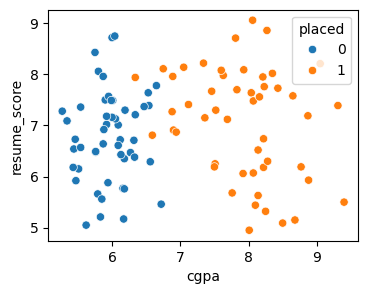

In [10]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=dataset, x = "cgpa", y="resume_score", hue ="placed")
plt.show()

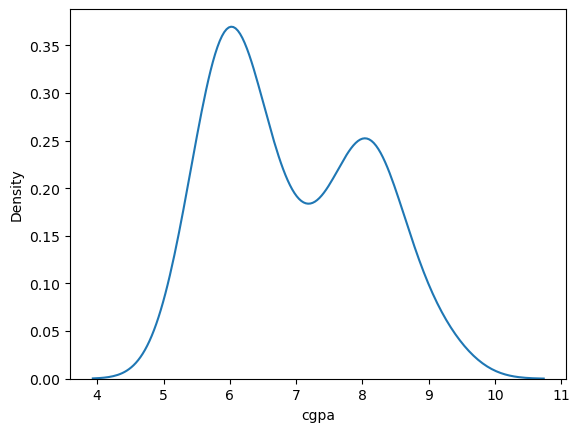

In [15]:
# make a KDE plot to know  if it has a normal distribution or not
sns.kdeplot(data= dataset["cgpa"])
plt.show()
#not totally normally distributed but not very skewed

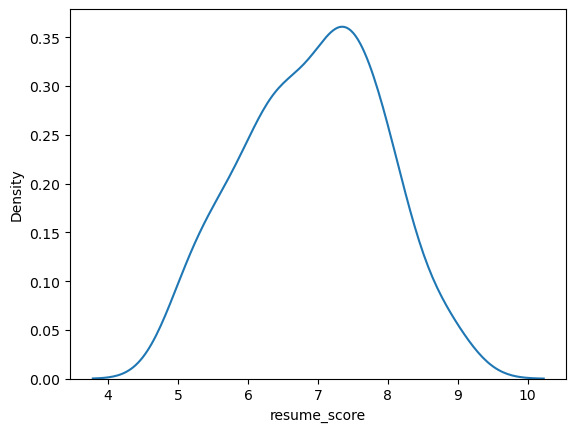

In [18]:
# make a KDE plot to know  if it has a normal distribution or not
sns.kdeplot(data= dataset["resume_score"])
plt.show()
#normally distributed and not very skewed

In [11]:
x = dataset.iloc[:,:-1]
y = dataset["placed"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
# let's try all three even though we know we're supposed to use Gaussian for ND
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [34]:
# perfect for Normal Distribution
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [35]:
gnb.score(x_test, y_test) *100, gnb.score(x_train, y_train) *100

(100.0, 97.5)

In [36]:
# would be perfect for discrete data or text data
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [37]:
mnb.score(x_test, y_test)*100

75.0

In [38]:
# would be perfect for Boolean
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [39]:
bnb.score(x_test, y_test)*100

50.0

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


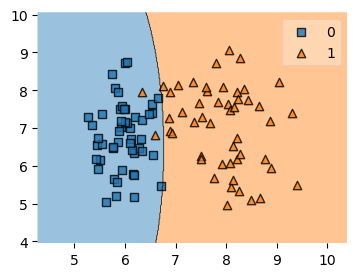

In [44]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = gnb)
plt.show()

# we can see it's almost perfect

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


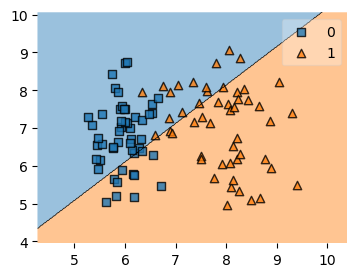

In [46]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = mnb)
plt.show()
# not so accurate

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


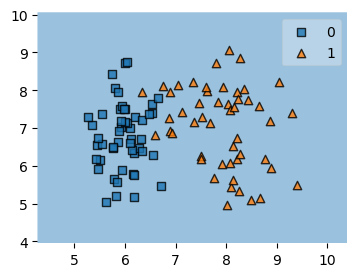

In [48]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = bnb)
plt.show()
# no line and all messed up